In [1]:
import pandas as pd
import numpy as np
import random
import operator
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore")

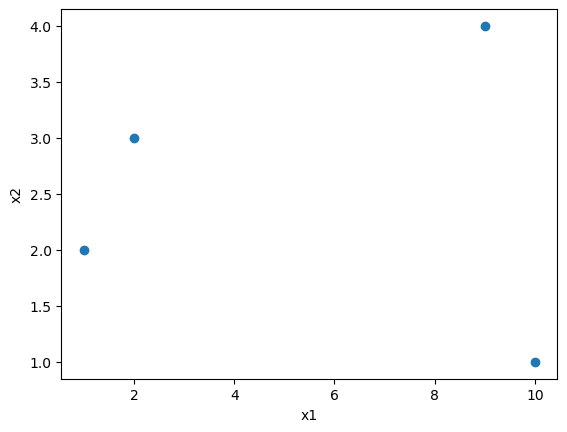

In [2]:
x1 = [1,2,9,10]
x2 = [2,3,4,1]


In [3]:
df = pd.DataFrame(list(zip(x1,x2)),columns=['x1','x2'])
df

,x1,x2
0,1,2
1,2,3
2,9,4
3,10,1


In [41]:
np.random.seed(42)
n = len(df)
k =2
d = 2
m =2 
max_iters = 10

In [42]:
def initializemembershipweight():
    weight  = np.random.dirichlet(np.ones(k),size=n) #randam center genreter
    weight_arr = np.array(weight)
    return weight_arr 

In [43]:
np.random.dirichlet(np.ones(k),size=n)

array([[0.13487081, 0.86512919],
       [0.59055148, 0.40944852],
       [0.50004212, 0.49995788],
       [0.02889269, 0.97110731]])

In [44]:
def computecentroids(weight_arr):
    c = []
    for i in range(k):
        weight_sum = np.power(weight_arr[:,1],m).sum()
        cj = []
        for x in range(d):
            num = (df.iloc[:,x].values*np.power(weight_arr[:,1],m)).sum()
            c_val = num/weight_sum
            cj.append(c_val)
        c.append(cj)
    return c

In [45]:
def updateweight(weight_arr,c):
    denon = np.zeros(n)
    
    for i in range(k):
        dist = (df.iloc[:,:].values-c[i])**2 
        dist = np.sum(dist,axis=1)
        dist = np.square(dist) #sum of square distance
        denon = denon + np.power(1/dist,2/(m-1))
        #raise each element of the reciprocal of squar
    for j in range(k):
        dist = (df.iloc[:,:].values-c[i])**2
        dist = np.sum(dist,axis=1)
        dist = np.square(dist)
        weight_arr[:,1] = np.divide(np.power(1/dist,2/(m-1)),denon)
    return weight_arr

In [49]:
def plot_data(z,c):
    plt.subplot(4,3,z+1)
    plt.scatter(list(df.iloc[:,0]),list(df.iloc[:,1]),s=200,marker ='o')
    for center in c:
        plt.scatter(center[0],center[1],s = 200 , marker = 'o',color = "r")
        plt.axis('equal')
        plt.xlabel('x',fontsize = 20)
        plt.ylabel('y',fontsize = 20)

In [50]:
def fuzzymeanalgorithem():
    weight_arr = initializemembershipweight()
    plt.figure(figsize=(50,50))
    for z in range(max_iters):
        c = computecentroids(weight_arr)
        updateweight(weight_arr,c)
        plot_data(z,c)
    plt.show()
    return (weight_arr,c)

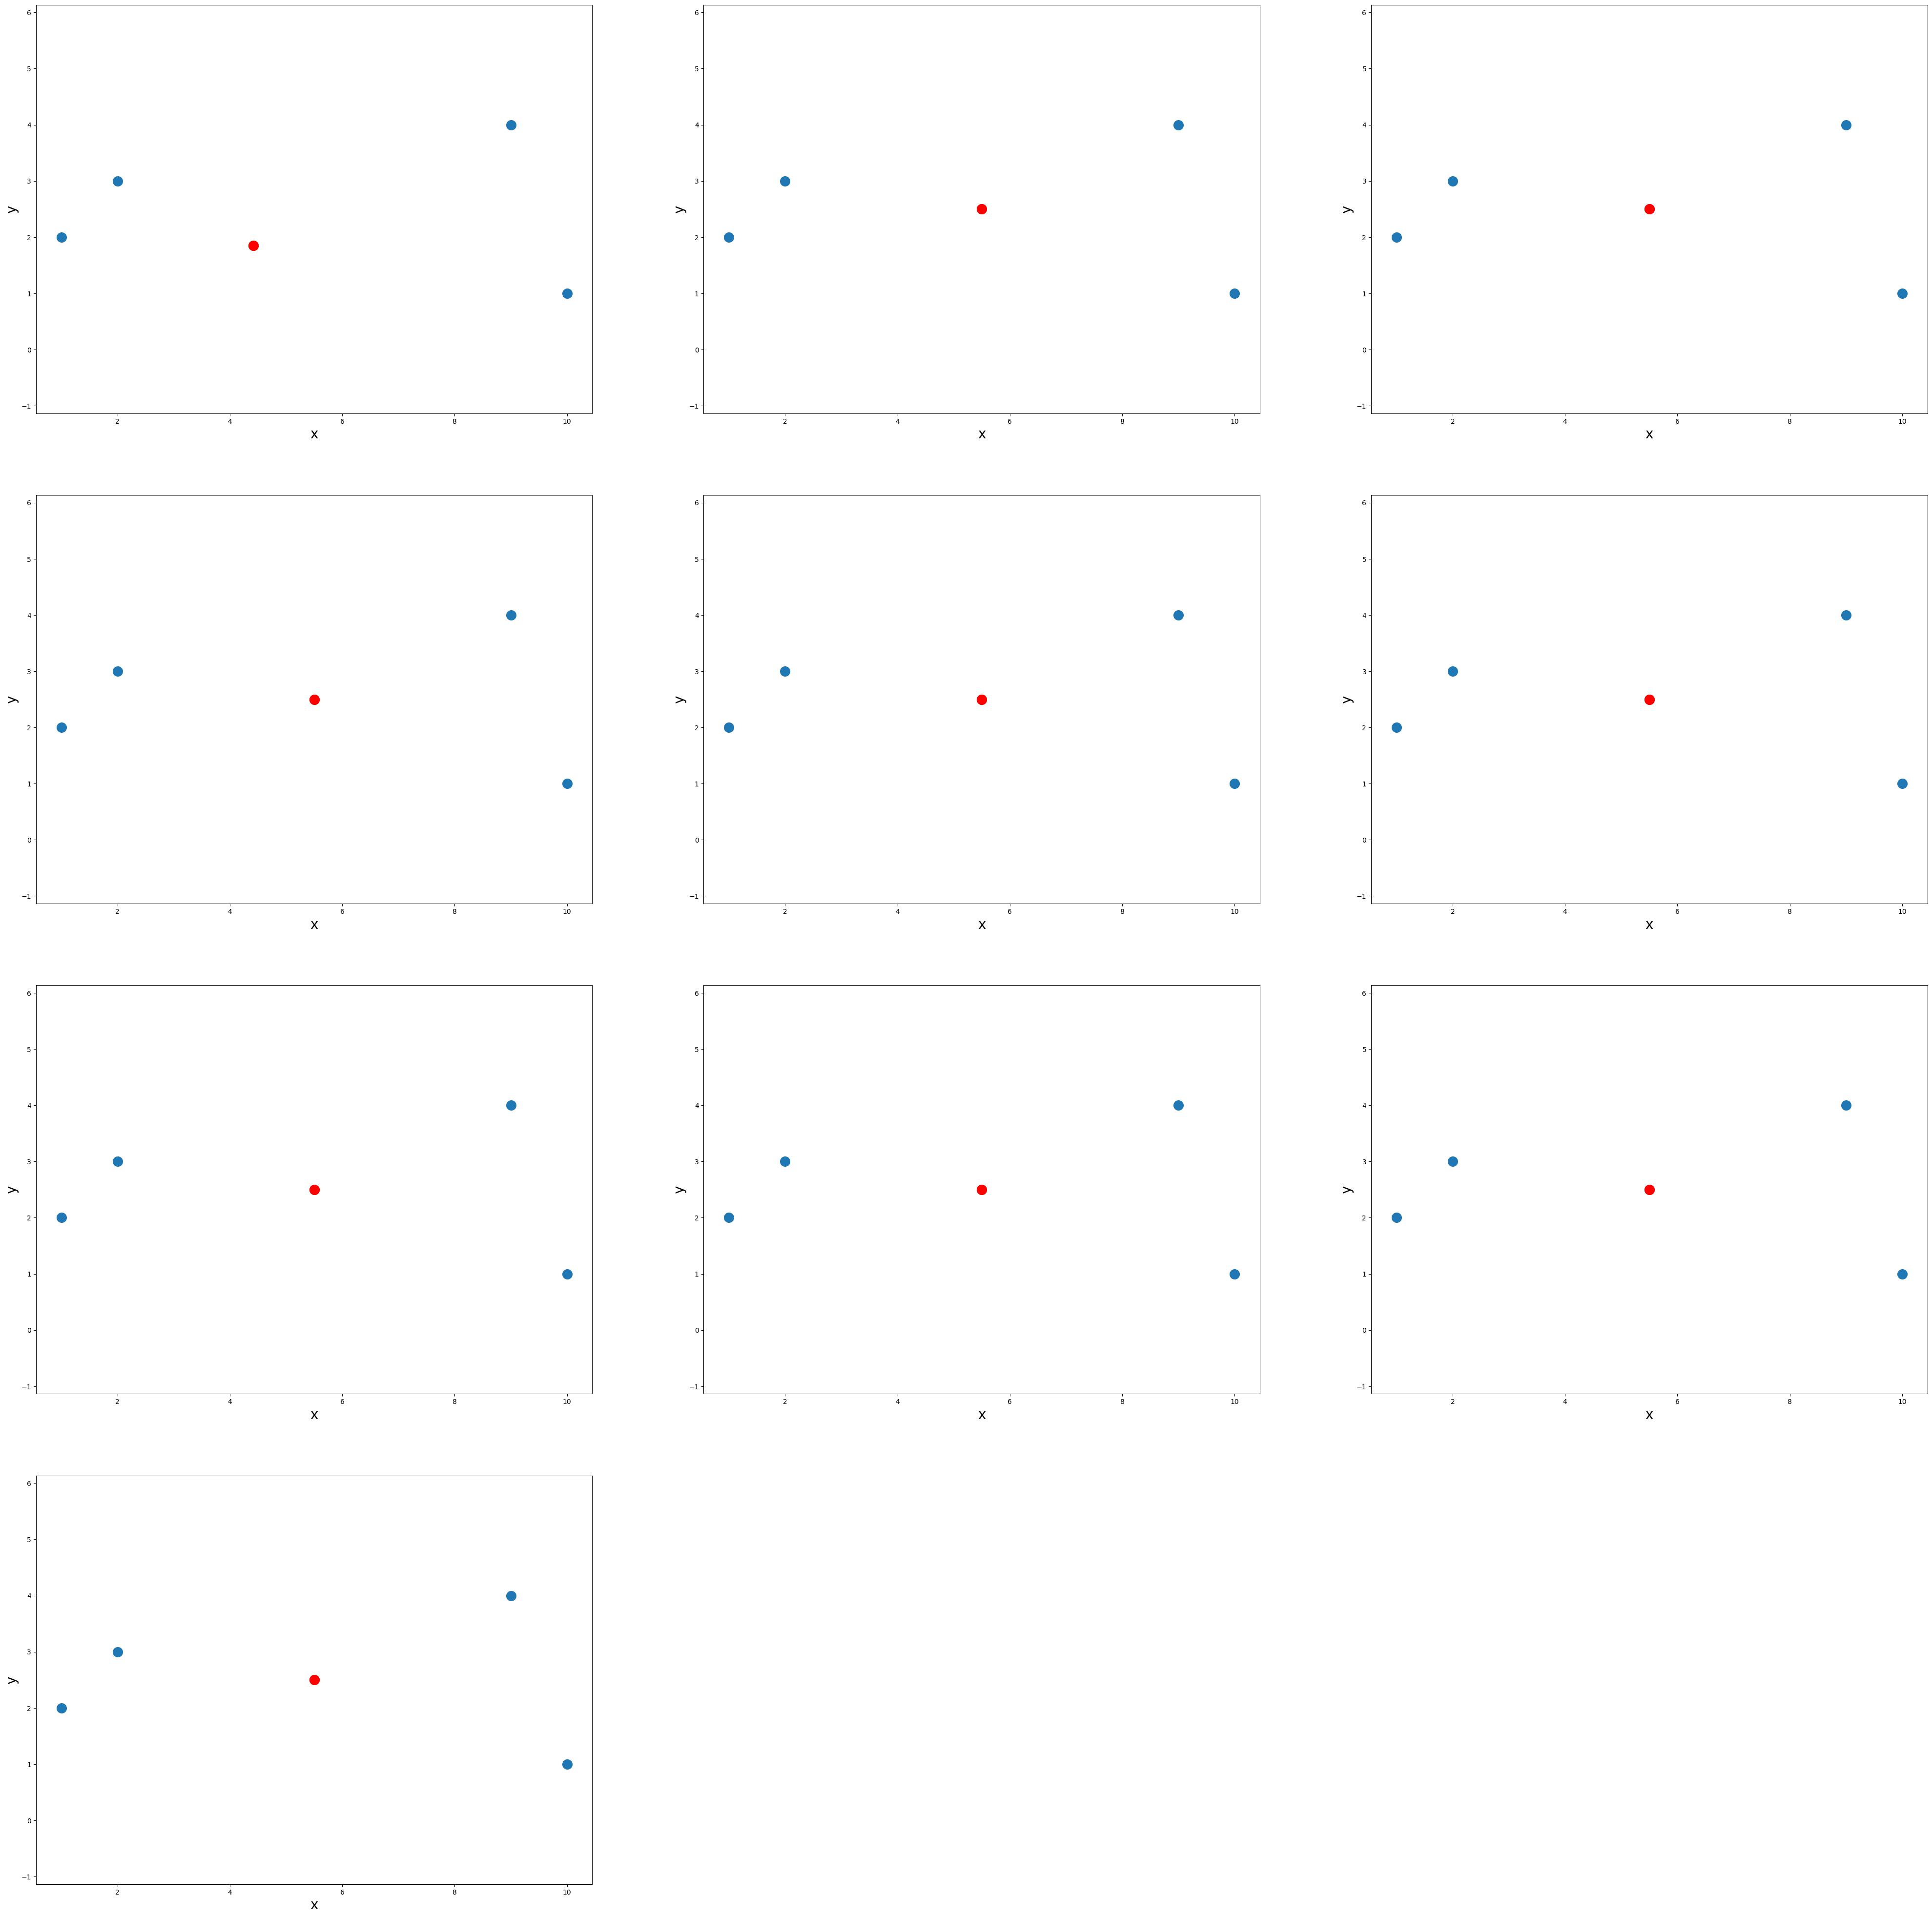

(array([[0.3277851 , 0.5       ],
        [0.62163321, 0.5       ],
        [0.86300038, 0.5       ],
        [0.43092872, 0.5       ]]),
 [[5.5, 2.5], [5.5, 2.5]])

In [51]:
fuzzymeanalgorithem()